## Import libraries and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
!pip install -q kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Load the data

In [5]:
!kaggle competitions download -c titanic
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 32.7MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Explore the data

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("Training data shape: ", train_data.shape) # Show how many rows and columns there are in the training data
print("Testing data shape: ", test_data.shape) # Show how many rows and columns there are in the test dataset.
train_data.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You can use .info(), .describe(), .value_counts() and other visualisation libraries to have an initial look at the data. We are looking for things like missing values, categorical features, data distributions and potential outlier.

The .info() function tells you how many entries and columns there are in the dataset. It tells you the column names, the number of non-null values and the data type of that column. Based on the information for this dataset most of the columns have no null values, but the Age, Cabin and Embarked columns do have a few null values which we'll need to handle somehow.



In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The .describe() function shows basic statistics about all of the columns in the dataset. For each column it shows the count, mean, std, minimum, maximum and quartiles. This may help you to see which columns have a wide range of values, which have means skewed towards the top or bottom of the range, which are more or less consistent, and other general things about the data.

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


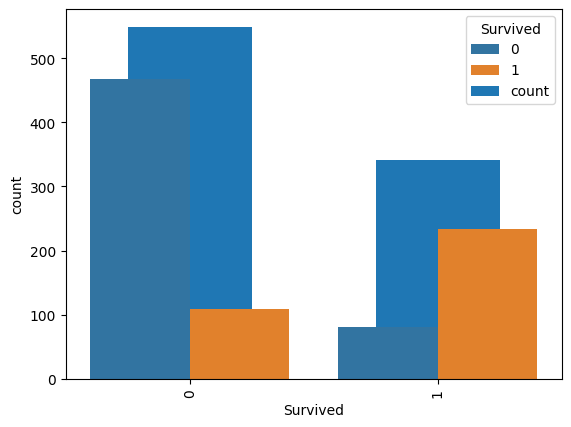

In [15]:
train_data['Survived'].value_counts().plot(kind='bar')
sns.countplot(x='Sex', data=train_data, hue = 'Survived')
plt.show()

## Data preprocessing
We saw from the train_data.info() function that there are some columns will null values. We can choose whether or not we want to deal with these, and how.